<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/6_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confusion matrix

- A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

- Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

- The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

- Here the results are not as good as they could be as our choice for the regularization parameter C was not the best. In real life applications this parameter is usually chosen using Tuning the hyper-parameters of an estimator.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


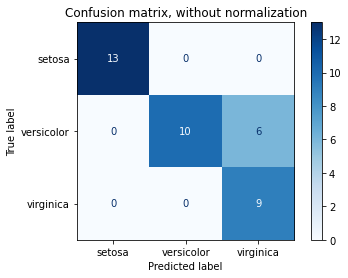

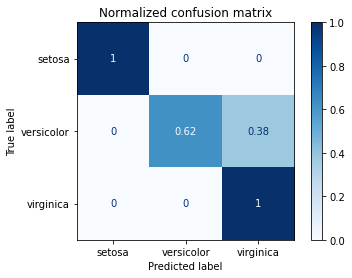

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

------------------------

- **Classification** is a process of **categorizing** a given set of data into **classes.**
In Machine Learning(ML), you frame the problem, collect and clean the data, add some necessary feature variables(if any), train the model, measure its performance, improve it by using some cost function, and then it is ready to deploy.

- But how do we measure its performance? Is there any particular feature to look at?

- A trivial and broad answer would be to **compare** the **actual values** to the **predicted values.** But that does not solve the issue. 
Let us consider the famous MNIST dataset and try to analyze the problem.

In [ ]:
# Importing the dataset.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
 
# Creating independent and dependent variables.
X, y = mnist['data'], mnist['target']

In [ ]:
# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [ ]:
"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""
 
# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [ ]:
"""
Building a dumb classifier that just classifies every single image in the “not-5” class.
"""
 
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
 
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([1., 1., 1.])

- If you executed the same code on an IDE, you would get an array of accuracies each with above 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

- This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### Confusion Matrix
- A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

--------------------------

https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

### Here’s what we’ll cover:
- What is a Confusion Matrix?

     - True Positive

     - True Negative

     - False Positive – Type 1 Error

     - False Negative – Type 2 Error

- Why need a Confusion matrix?

- Precision vs Recall

- F1-score

- Confusion matrix in Scikit-learn

- Confusion matrix for multi-class Classification

### What is a Confusion Matrix?
- The million dollar question – what, after all, is a confusion matrix?

- A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

- For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

image

Let’s decipher the matrix:

  - The target variable has two values: **Positive** or **Negative**

  - The **columns** represent the **actual values** of the target variable

  - The **rows** represent the **predicted values** of the target variable

But wait – what’s TP, FP, FN and TN here? That’s the crucial part of a confusion matrix. Let’s understand each term below.

### Understanding True Positive, True Negative, False Positive and False Negative in a Confusion Matrix
**True Positive (TP)** 

  - The predicted value matches the actual value
  - The actual value was positive and the model predicted a positive value

**True Negative (TN)** 

  - The predicted value matches the actual value
  - The actual value was negative and the model predicted a negative value

**False Positive (FP) – Type 1 error**

  - The predicted value was falsely predicted
  - The actual value was negative but the model predicted a positive value
  - Also known as the Type 1 error

**False Negative (FN) – Type 2 error**

  - The predicted value was falsely predicted
  - The actual value was positive but the model predicted a negative value
  - Also known as the Type 2 error

Let me give you an example to better understand this. Suppose we had a classification dataset with 1000 data points. We fit a classifier on it and get the below confusion matrix:

image

The different values of the Confusion matrix would be as follows:

  - True Positive (TP) = 560
  
      - meaning 560 positive class data points were correctly classified by the model

  - True Negative (TN) = 330
  
      -  meaning 330 negative class data points were correctly classified by the model

  - False Positive (FP) = 60
  
     - meaning 60 negative class data points were incorrectly classified as belonging to the positive class by the model

  - False Negative (FN) = 50
  
     -  meaning 50 positive class data points were incorrectly classified as belonging to the negative class by the model


This turned out to be a pretty decent classifier for our dataset considering the relatively larger number of true positive and true negative values.

Remember the Type 1 and Type 2 errors. Interviewers love to ask the difference between these two!

### Why Do We Need a Confusion Matrix?
Before we answer this question, let’s think about a hypothetical classification problem.

Let’s say you want to predict how many people are infected with a contagious virus in times before they show the symptoms, and isolate them from the healthy population (ringing any bells, yet? 😷). The two values for our target variable would be: Sick and Not Sick.

Now, you must be wondering – why do we need a confusion matrix when we have our all-weather friend – Accuracy? Well, let’s see where accuracy falters.

image

96%! Not bad!

But it is giving the wrong idea about the result. Think about it.

Our model is saying “I can predict sick people 96% of the time”. However, it is doing the opposite. It is predicting the people who will not get sick with 96% accuracy while the sick are spreading the virus!

Do you think this is a correct metric for our model given the seriousness of the issue? Shouldn’t we be measuring how many positive cases we can predict correctly to arrest the spread of the contagious virus? Or maybe, out of the correctly predicted cases, how many are positive cases to check the reliability of our model?

This is where we come across the dual concept of Precision and Recall.

### Precision vs. Recall

### F1-Score

### Confusion Matrix for Multi-Class Classification

- How would a confusion matrix work for a multi-class classification problem? Well, don’t scratch your head! We will have a look at that here.

- Let’s draw a confusion matrix for a multiclass problem where we have to predict whether a person loves Facebook, Instagram or Snapchat. The confusion matrix would be a 3 x 3 matrix like this:



--------------------------------

2. Understanding the confusion matrix
Suppose that the test data consists of 40 records. The classifier will then predict whether or not a person has the flu. The following confusion matrix was generated based on the classifier’​s results:

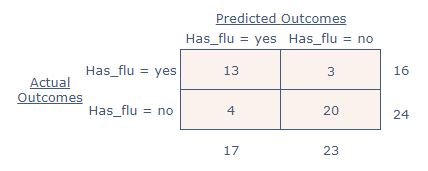

The actual outcomes contain information on whether or not each individual had the flu, while the predicted outcomes are the predictions made by the classification model.

According to the information provided by the confusion matrix:

  - The model correctly predicted that 13 people had the flu.

  - The model falsely predicted that 3 people did not have the flu.

  - The model correctly classified 20 people in the has_flu = no category.

  - The model incorrectly classified that 4 people (who actually did not have the flu) had the flu.
 
  - The model predicted that 17 (13 + 4) people had the flu.

  - The model predicted that 23 (20 + 3) people did not have the flu.

  - In actuality, 16 (13 + 3) people had the flu.

  - In actuality, 24 (4 + 20) people did not have the flu.

The following illustration summarizes some important facts:


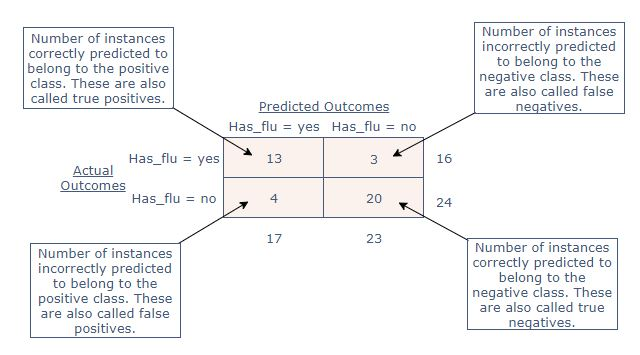

---------------

https://letsdiscuss.medium.com/understanding-confusion-matrix-for-classification-8a51984cedab

https://letsdiscuss.medium.com/plotting-a-confusion-matrix-machine-learning-in-python-c9eecb9c6ee7

----------------------------------------

https://keytodatascience.com/confusion-matrix/

In [ ]:
# Python script for confusion matrix creation.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = ['dog','cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat']
predicted = ['dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat']
results = confusion_matrix(actual, predicted)

print ('Confusion Matrix :')
print(results)

print ('Accuracy Score :',accuracy_score(actual, predicted))
print('Classification Report : ')

print (classification_report(actual, predicted))

Confusion Matrix :
[[3 1]
 [2 4]]
Accuracy Score : 0.7
Classification Report : 
              precision    recall  f1-score   support

         cat       0.60      0.75      0.67         4
         dog       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



------------------------------

https://www.youtube.com/watch?v=A_ZKMsZ3f3o

- **ROC & AUC** curve mainly used for **Binary Classification Problem**

- Logistic Regression: Threshold value anything greater than 0.5 considers as 1 and anything less than 0.5 considers as 0.

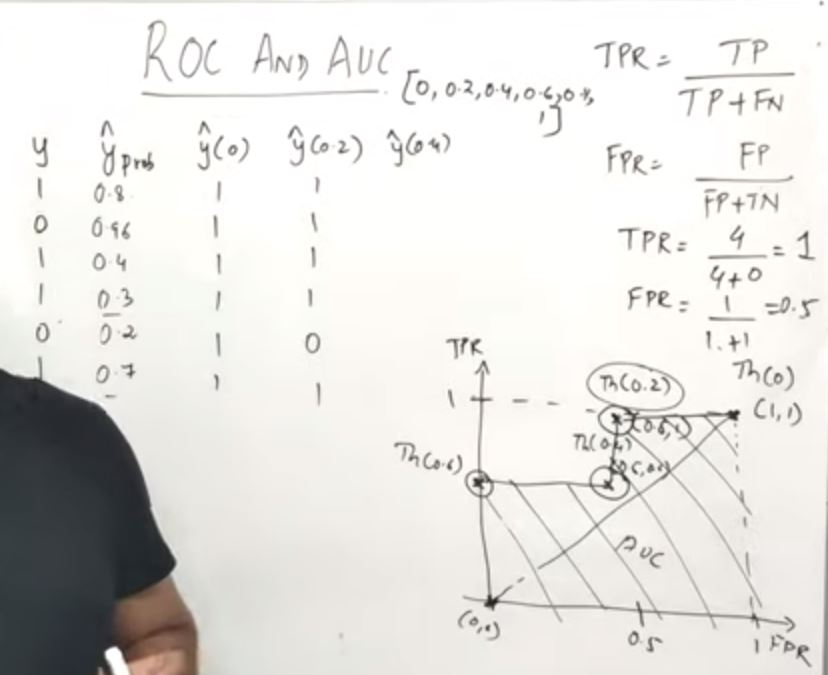

-----------------------------------

https://www.youtube.com/watch?v=_AjhdXuXEDE

### How To Find Optimal Threshold For Binary Classification

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

### Understanding the AUC-ROC Curve in Python

In [1]:
# auc roc curve

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


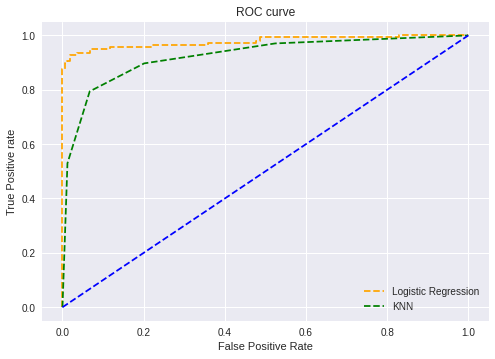

In [2]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

### AUC-ROC for Multi-Class Classification

Like I said before, the AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique.

So, if we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

The ROC curve for multi-class classification models can be determined as below:

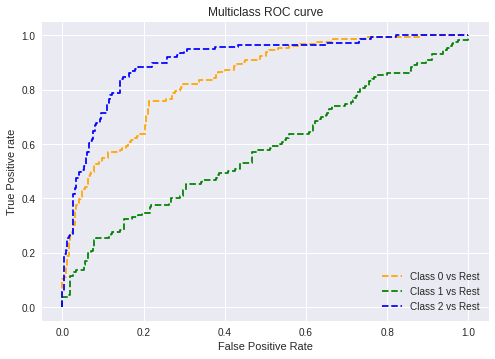

In [3]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

-------------------------------------

### Precision Vs Recall

https://www.youtube.com/watch?v=lSRmmVDnLQk